In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 


# 1)

In [72]:
df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', None)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [55]:
print(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [77]:
df.drop(df[df['yr_renovated'] == 0].index, inplace = True)
df.drop(df[df['yr_built'] == 0].index, inplace = True)
df.drop('county_name',axis='columns', inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
230,8096000060,20150413T000000,655000.0,2,1.75,1450,15798,2.0,1,4,3,7,1230,220,1915,1978,98166,47.4497,-122.375,2030,13193
1261,7636800041,20140625T000000,995000.0,3,4.50,4380,47044,2.0,1,3,3,9,3720,660,1968,1990,98166,47.4734,-122.365,2460,18512
1417,7663700030,20150503T000000,1175000.0,2,2.50,1770,7155,2.0,1,4,3,8,1770,0,1957,2004,98155,47.7345,-122.285,2410,10476
1949,1922039062,20150420T000000,480000.0,2,1.50,1008,26487,1.0,1,4,4,6,1008,0,1943,2002,98070,47.3853,-122.479,1132,24079
2179,3343301920,20150302T000000,1650000.0,3,2.75,2690,8890,2.0,1,4,4,10,2690,0,1975,1991,98006,47.5487,-122.197,2940,8890
2864,4114601570,20141118T000000,3600000.0,3,3.25,5020,12431,2.0,1,4,3,10,3420,1600,1941,2002,98144,47.5925,-122.287,3680,12620
3252,3343301910,20141020T000000,1000000.0,5,4.50,2120,8944,2.0,1,4,5,8,2120,0,1939,1963,98006,47.5488,-122.197,2870,8944
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
3934,1269200229,20140723T000000,1379900.0,3,3.25,3786,38038,1.0,1,4,3,9,1934,1852,1978,2006,98070,47.3907,-122.448,2850,33361
4369,4166600115,20141121T000000,1150000.0,3,2.75,3230,75889,2.0,1,4,3,7,3230,0,1925,1993,98023,47.3344,-122.370,2560,72229


# 2)

i will use for this Checkpoint : 
- Price
- bedrooms
- bathrooms
- sqft living
- floors

# 3)

In [56]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [58]:
print(len(x_train),'/',len(y_train))
print(len(x_test),'/',len(y_test))

14048 / 14048
7565 / 7565


# 4)

In [59]:
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)


# 5)

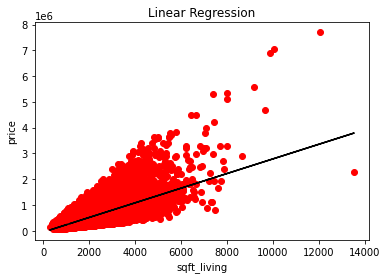

In [60]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

# 6)

In [61]:
print(model.intercept_)
print(model.coef_)

-50697.941076350166
[284.00261205]


In [62]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


# 7)

In [63]:
x=df[["sqft_living","sqft_lot"]]  
y=df["price"].values
mx_train,mx_test,my_train,my_test=train_test_split(x,y,test_size=0.35,random_state=40) 

In [64]:
model=LinearRegression()
model.fit(mx_train,my_train)
mpredicted=model.predict(mx_test)


In [65]:

print("MSE", mean_squared_error(my_test,mpredicted))
print("R squared", metrics.r2_score(my_test,mpredicted))

MSE 62742250513.164314
R squared 0.500926798405561


In [66]:
print('MSE :')
print('linear ',mean_squared_error(y_test,predicted))
print('multi-linear :',mean_squared_error(my_test,mpredicted))
print('R squared :')
print('linear ',metrics.r2_score(y_test,predicted))
print('multi-linear :',metrics.r2_score(my_test,mpredicted))

MSE :
linear  62902408306.86502
multi-linear : 62742250513.164314
R squared :
linear  0.4996528488387417
multi-linear : 0.500926798405561


In [67]:

# create matrix and vectors
x = df[["sqft_living","sqft_lot"]]  
y = df["price"].values

lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 

In [68]:
x_=poly.fit_transform(x)

In [69]:
print(x)
print(x_)

       sqft_living  sqft_lot
0             1180      5650
1             2570      7242
2              770     10000
3             1960      5000
4             1680      8080
...            ...       ...
21608         1530      1131
21609         2310      5813
21610         1020      1350
21611         1600      2388
21612         1020      1076

[21613 rows x 2 columns]
[[1.0000000e+00 1.1800000e+03 5.6500000e+03 1.3924000e+06 6.6670000e+06
  3.1922500e+07]
 [1.0000000e+00 2.5700000e+03 7.2420000e+03 6.6049000e+06 1.8611940e+07
  5.2446564e+07]
 [1.0000000e+00 7.7000000e+02 1.0000000e+04 5.9290000e+05 7.7000000e+06
  1.0000000e+08]
 ...
 [1.0000000e+00 1.0200000e+03 1.3500000e+03 1.0404000e+06 1.3770000e+06
  1.8225000e+06]
 [1.0000000e+00 1.6000000e+03 2.3880000e+03 2.5600000e+06 3.8208000e+06
  5.7025440e+06]
 [1.0000000e+00 1.0200000e+03 1.0760000e+03 1.0404000e+06 1.0975200e+06
  1.1577760e+06]]
